In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
class Adaline():
    def __init__(self, lr=0.01, n_iter=50, random_state=1):
        self.lr = lr
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        self.cost = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errs = (y - output)
            self.w[1:] += self.lr * X.T.dot(errs)
            self.w[0] += self.lr * errs.sum()
            cost = (errs**2).sum() / 2.0
            self.cost.append(cost)

        return self

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [3]:
df = pd.read_csv('datasets/iris.csv', header=None, encoding='utf-8')
df.head(5)

,0,1,2,3,4
0,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [4]:
X = df.iloc[1:100, [0, 2]].values
y = df.iloc[1:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)
X = X.astype('float')

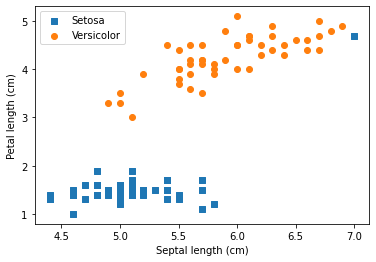

In [19]:
plt.scatter(X[:50, 0], X[:50, 1], marker='s', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], marker='o', label='Versicolor')
plt.legend(loc='upper left')
plt.xlabel('Septal length (cm)')
plt.ylabel('Petal length (cm)')
plt.show()

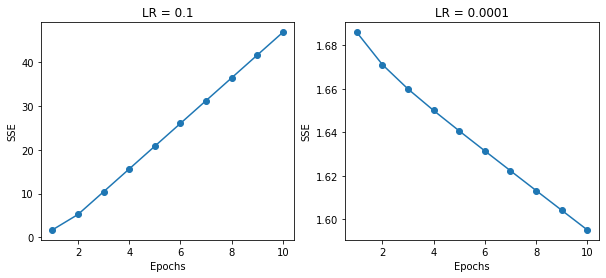

In [29]:
# Let us choose two learning rates 0.1 and 0.0001
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

adaline1 = Adaline(lr=0.1, n_iter=10)
adaline.fit(X, y)   
ax[0].plot(range(1, len(adaline.cost) + 1), np.log10(adaline.cost), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('SSE')
ax[0].set_title('LR = 0.1')

adaline2 = Adaline(lr=0.0001, n_iter=10)
adaline2.fit(X, y)
ax[1].plot(range(1, len(adaline2.cost) + 1), np.log10(adaline2.cost), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('SSE')
ax[1].set_title(f'LR = {adaline2.lr}')
plt.show()

In [ ]:
# We can see on the left that with the larger learning rate, the step size becomes too big 
# and makes larger jump and the error becomes larger in every epoch, because we overshoot 
# the global cost minimum